## <center> Machine Learning Programming Exercise 7</center>
# <center> **Partie 1: Exploration de la librairie Tensorflow 2.x** </center>


| <font size=6,font color='red'>Monôme / binôme</font> | <font size=6,font color='red'>Nom</font> | <font size=6,font color='red'>Prénom</font> |
|:-------------: |:----------- |:------ |
| monôme/binôme 1 | <span style="color:red">Remplacer ici</span> | <span style="color:red">et ici</span> |
| binôme 2 | <span style="color:red">Remplacer ici</span> | <span style="color:red">et ici</span> |


Jusqu'à présent, vous avez toujours utilisé numpy pour construire des petits réseaux de neurones. Nous allons maintenant découvrir un framework plus adapté pour l'apprentissage et l'utilisation de modèles de réseaux de neurones possédants un grand nombre de paramètres. Ce type de modèles fait usage de nombreux calculs qui peuvent être parallélisés. Un framework de machine learning (tel que TensorFlow, pyTorch, etc.) faisant usage de calculs sur GPUs peut alors accélérer considérablement le développement de votre algorithme d'apprentissage. Ces frameworks permettent également (comme scikit-learn) la création rapide et simplifiée de réseaux de neurones.
Tous ces frameworks sont accompagnés d'une abondante documentation, que vous pouvoir lire librement.

Dans ce TP, vous apprendrez avec TensorFlow 2.0 à initialiser les tenseurs et calculer mais aussi à élaborer, apprendre, analyser et évaluer un modèle de réseau de neurones.

Vous devez:
- compléter le code aux endroits indiqués;
- élaborer, apprendre, analyser et évaluer avec tensorflow, un réseau de neurones sur la base d'images de fonds marins (rencontrés dans un TP précédent)

Ce tutoriel est largement basé sur ces sources:
 - Francois Chollet's github (Tensorflow_2_0_+_Keras_Crash_Course.ipynb)
 - Boscher's github (v02_Tensorflow_2_0_+_Keras_Crash_Course.ipynb)
 - MIT course's github (Part1_TensorFlow.ipynb)
 - Magnus Erik Hvass Pedersen's github (https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/01_Simple_Linear_Model.ipynb)

Le framework TensorFlow tire son nom de sa gestion des flux (flow = node = opération mathématique) de tenseurs, qui sont des structures de données que l'on peut considérer comme des tableaux multidimensionnels. Les tenseurs sont représentés par des tableaux à $n$ dimensions de types de données de base tels qu'une chaîne ou un entier. Ils permettent de généraliser les vecteurs et les matrices à des dimensions plus élevées.


## 1 - Imports

Pour pouvoir commencer, vous importerez les librairies suivantes:

## 1.1 Colab or not

In [2]:
# common imports
import sys,os,glob

# Colab preamble
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:

  # mount google drive directories
  from google.colab import drive
  drive.mount('/content/gdrive', force_remount=True)


  # ----------- Your code here --------------------->
  # replace the ipynb_name (below) with the name of your jupyter notebook file

  ipynb_name = 'partie1.ipynb'

  # ------------------------------------------------>

  ipynb_name = glob.glob(os.getcwd() + '/gdrive/MyDrive/Machine_Learning/' + ipynb_name, recursive = True)
  code_folder = os.path.dirname(ipynb_name[0])

  # change to the right folder
  %cd "$code_folder"
  !ls

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Mounted at /content/gdrive
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-58-bdecde3a7f3c>", line 20, in <cell line: 6>
    ipynb_name = glob.glob(os.getcwd() + '/gdrive/MyDrive/Machine_Learning/' + ipynb_name, recursive = True)
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'OSError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fi

## 1.2 Import packages

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

SEED = 1
np.random.seed(SEED)
tf.random.set_seed(SEED)



## 2 - Déclarer des tenseurs constants

Vous vous reporterez à [l'adresse suivante](https://www.tensorflow.org/guide/tensor) pour plus de détails.


### 2.1 - Tenseurs 0-d
Examinons d'abord les tenseurs 0-d, dont un scalaire, une chaîne de caractères sont des exemples :

In [5]:
sport = tf.constant("Tennis", tf.string)
number = tf.constant(1.41421356237, tf.float64)
print(sport)
print(number)

tf.Tensor(b'Tennis', shape=(), dtype=string)
tf.Tensor(1.41421356237, shape=(), dtype=float64)


### 2.2 - Tenseurs constants 1-d
Une manière classique de créer des tenseurs constants est d'utiliser `tf.ones` ou `tf.zeros` (comme en numpy `np.ones` et `np.zeros`):

In [6]:
print(tf.ones(shape=(2, 1)))
print(tf.zeros(shape=(2, 1)))

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


Les listes peuvent être utilisées pour créer des tenseurs 1d:

In [7]:
sports = tf.constant(["Tennis", "Basketball"], tf.string)
numbers = tf.constant([3.141592, 1.414213, 2.71821], tf.float64)
print(sports)
print(numbers)

tf.Tensor([b'Tennis' b'Basketball'], shape=(2,), dtype=string)
tf.Tensor([3.141592 1.414213 2.71821 ], shape=(3,), dtype=float64)


### 2.3 - Tenseurs n-d
Ensuite, nous pouvons créer des tenseurs 2-d (c'est-à-dire des matrices) et des tenseurs de rang supérieur. Dans les TP suivants de traitement d'images, nous utiliserons des tenseurs 4-d. Ces dimensions correspondent au nombre d'images d'exemple dans notre base de données, à la hauteur et à la largeur de l'image, ainsi qu'au nombre de canaux de couleur.

In [8]:
### Defining higher-order Tensors ###

# ----------- Your code here --------------------->
# Define a 2-d Tensor constant 2 x 2, with [5,2] sur la première ligne et [1,3] sur la seconde.

matrix =  tf.constant([[5, 2],
                       [3, 4]], dtype=tf.int32)

# ------------------------------------------------>

print(matrix)

# les méthodes suivantes seront expliquées plus tard
assert isinstance(matrix, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(matrix).numpy() == 2

tf.Tensor(
[[5 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [9]:
# ----------- Your code here --------------------->
# Define a 4-d Tensor.
# Use tf.zeros to initialize a 4-d Tensor of zeros with size 10 x 256 x 256 x 3.
#   You can think of this as 10 images where each image is RGB 256 x 256.

images = tf.zeros(shape=(10,256,256,3))# TODO

# ------------------------------------------------>


print(images)

# les méthodes suivantes seront expliquées plus tard
assert isinstance(images, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(images).numpy() == 4, "matrix must be of rank 4"
assert tf.shape(images).numpy().tolist() == [10, 256, 256, 3], "matrix is incorrect shape"

tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
 

### 2.4 - Générer des nombres aléatoires
- créer un tenseur constant contenant des réels générés aléatoirement par une **distribution gaussienne** dans : `tf.random.normal`
- créer un tenseur constant contenant des entiers générés aléatoirement par une **distribution uniforme** dans `tf.random.uniform`

In [10]:
tf.random.normal(shape=(2, 2), mean=0., stddev=1., seed=SEED)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 0.28183395,  2.3878284 ],
       [ 2.2804048 , -0.308662  ]], dtype=float32)>

In [11]:
tf.random.uniform(shape=(2, 2), minval=0, maxval=10, dtype='int32', seed=SEED)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[0, 8],
       [7, 2]], dtype=int32)>

### 3 - Trouver/changer les caractéristiques des tenseurs (méthodes de tenseurs)

#### 3.1 - Convertir de tensorflow vers numpy (et inversement)

Vous pouvez faire la conversion par un appel à la fonction `.numpy()` and faire la conversion inverse avec  `tf.convert_to_tensor()`:

In [12]:
# ----------- Your code here --------------------->
# choose a previously defined tensor.
T = matrix # TO DO

# ------------------------------------------------>

print(T)

print('vers numpy:')
T_np=T.numpy()
print(T_np)

print('retour à tf:')
tf_T = tf.convert_to_tensor(T_np)
print(tf_T)


tf.Tensor(
[[5 2]
 [3 4]], shape=(2, 2), dtype=int32)
vers numpy:
[[5 2]
 [3 4]]
retour à tf:
tf.Tensor(
[[5 2]
 [3 4]], shape=(2, 2), dtype=int32)


#### 3.2 - Gérer le data type: connaitre, convertir

- Choisissez un des tenseurs définis précédemment ou initialiser en un nouveau;
- La commande `dtype` permet de s'informer sur son data type (Plus de détails à l'[adresse suivante](https://www.tensorflow.org/api_docs/python/tf/dtypes/DType));
- Réalisez les conversions de type avec `tf.cast`.

In [13]:
# ----------- Your code here --------------------->
# choose a previously defined tensor.

T = matrix # TO DO

# ------------------------------------------------>

print("`T` is a Tensor with data type: {}".format(T.dtype))

# cast to float
T_f32 = tf.cast(T, dtype=tf.float32)
print(T_f32)

print(tf.cast(T, dtype=tf.int64))

#print(tf.cast(T, dtype=tf.string))



`T` is a Tensor with data type: <dtype: 'int32'>
tf.Tensor(
[[5. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[5 2]
 [3 4]], shape=(2, 2), dtype=int64)


#### 3.3 - Connaitre le nombre de dimensions (rang) et la taille de chaque dimension
- La ```shape``` d'un tenseur définit son nombre de dimensions et la taille de chaque dimension.
- Le ```rank``` d'un tenseur fournit le nombre de dimensions ($n$-dimensions) -- vous pouvez aussi considérer cela comme l'ordre ou le degré du tenseur.



In [14]:
# ----------- Your code here --------------------->
# choose a previously defined tensor.

T = matrix # TO DO

# ------------------------------------------------>

print("`T` is a {}-d Tensor with shape: {}".format(tf.rank(T).numpy(), tf.shape(T)))

`T` is a 2-d Tensor with shape: [2 2]


#### 3.4 - Sur quel device est stocké le tenseur?
La commande `.device` permet de connaitre si le tenseur est stocké dans la mémoire du GPU ou du CPU.

In [15]:
# ----------- Your code here --------------------->
# choose a previously defined tensor.'''

T = matrix # TO DO

# ------------------------------------------------>

print("`T` is a {} Tensor".format(T.device))


`T` is a /job:localhost/replica:0/task:0/device:CPU:0 Tensor


#### 3.5 - Indexer les tenseurs pour accèder aux sous-tenseurs

Comme dans numpy, vous pouvez utiliser le découpage pour accéder aux sous-tenseurs d'un tenseur de rang supérieur :

In [16]:
# ----------- Your code here --------------------->
# choose a previously defined tensor.

T = matrix # TO DO

# ------------------------------------------------>

assert isinstance(T, tf.Tensor), "T must be a tf Tensor object"
assert tf.rank(T).numpy() > 0, "T must be of rank greater to 0"


row_vector = T[1]
column_vector = T[:,1]
scalar = T[1, 1]

print("`row_vector`: {}".format(row_vector.numpy()))
print("`column_vector`: {}".format(column_vector.numpy()))
print("`scalar`: {}".format(scalar.numpy()))

`row_vector`: [3 4]
`column_vector`: [2 4]
`scalar`: 4


## 4 - Tenseurs variables

Les tenseurs [Variables](https://www.tensorflow.org/guide/variable) sont des cas particuliers des tenseurs permettant de stocker en mémoire des états variables (les valeurs des variables).

In [17]:
initial_value = tf.random.normal(shape=(2, 2))
a = tf.Variable(initial_value)
print(a)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-1.1012203 ,  1.5457517 ],
       [ 0.383644  , -0.87965786]], dtype=float32)>


Pour changer la valeurs d'une variable, il faut utiliser les méthodes `.assign(value)`, ou `.assign_add(increment)` ou `.assign_sub(decrement)`:

In [18]:
new_value = tf.random.normal(shape=(2, 2))
a.assign(new_value)
# check
for i in range(2):
  for j in range(2):
    assert a[i, j] == new_value[i, j]

## 5 - Calculer avec les tenseurs

### 5.1 Tensorflow définit des graphes pour calculer

Une façon pratique d'envisager et de visualiser les calculs dans TensorFlow est de les effectuer sous forme de graphiques. Nous pouvons définir ce graphique en termes de tenseurs, qui contiennent des données, et les opérations mathématiques qui agissent sur ces tenseurs dans un certain ordre. Prenons un exemple simple, et définissons ce calcul à l'aide de TensorFlow :

<img src="https://drive.google.com/uc?export=view&id=1rns_AJ6k_Xdq1RBGTK3lcfUG6qQdU3tK" style="width:600px;height:150px ;">

figure tiré de MIT Deep learning course

In [19]:
added_value = tf.random.normal(shape=(2, 2))
a.assign_add(added_value)
# check
for i in range(2):
  for j in range(2):
    assert a[i, j] == new_value[i, j] + added_value[i, j]

In [20]:
# Create the nodes in the graph, and initialize values
a = tf.constant(15)
b = tf.constant(61)

# Add them!
c1 = tf.add(a,b)
c2 = a + b # TensorFlow overrides the "+" operation so that it is able to act on Tensors
print(c1)
print(c2)

tf.Tensor(76, shape=(), dtype=int32)
tf.Tensor(76, shape=(), dtype=int32)


Pour obtenit le tenseur de valeur 76, un graphe de calculs composé d'opérations TensorFlow a été créé et exécuté.

Considérons maintenant un exemple un peu plus compliqué :

<img src="https://drive.google.com/uc?export=view&id=181ouV6fjRQ-Ejg26g8HjceUY4PGr6eR2" style="width:400px;height:200px ;">

Ici, nous considérons deux entrées, `a`, `b`, et calculons une sortie `e`. Chaque noeud du graphique représente une opération qui prend une entrée, effectue un calcul et transmet sa sortie à un autre noeud.

Définissons une fonction simple dans TensorFlow pour construire cette fonction de calcul :


In [36]:
### Defining Tensor computations ###

# Construct a simple computation function
def func(a,b):

    # ----------- Your code here --------------------->
    # Define the operation for c, d, e (use tf.math.add, tf.math.subtract, tf.math.multiply).

    c = tf.add(a,b)
    d = tf.subtract(b,1)
    e = tf.math.multiply(c,d)

    # ------------------------------------------------>


    return e

Exécutons cette fonction par le biais d'un graphe en assignant des valeurs aux variables `a,b`:

In [37]:
# Consider example values for a,b
a, b = 1.5, 2.5
# Execute the computation
e_out = func(a,b)
print(e_out)

tf.Tensor(6.0, shape=(), dtype=float32)


Autre exemple:

In [23]:
a = tf.random.normal(shape=(2, 2))
b = tf.random.normal(shape=(2, 2))

c = a + b
d = tf.square(c)
e = tf.exp(d)

print(c)
print(d)
print(e)

tf.Tensor(
[[2.3058357  0.61166906]
 [1.0210727  1.0482416 ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[5.3168783  0.37413904]
 [1.0425895  1.0988104 ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[203.74686     1.4537393]
 [  2.8365529   3.0005944]], shape=(2, 2), dtype=float32)


### 5.2 - Fonction linéaire (combinaison linéaire)

Calculez l'équation suivante : $h_{W,b}(X) = WX + b$, où $W$ et $X$ sont des matrices aléatoires et $b$ est un vecteur aléatoire.

- $X$ et $b$ sont tirés d'une distribution normale aléatoire.
- $W$ est de dimension (4, 3), $X$ est (3,1) et $b$ est (4,1).

Les fonctions suivantes peuvent vous être utiles :
- tf.matmul(..., ...) pour effectuer une multiplication matricielle
- tf.add(..., ...) pour faire une addition



In [24]:
# GRADED FUNCTION: linear_function

def linear_function():
    """
    Implements a linear function:
            Initializes W to be a random tensor of shape (4,3)
            Initializes X to be a random tensor of shape (3,1)
            Initializes b to be a random tensor of shape (4,1)
    Returns:
    result -- runs the session for Y = WX + b
    """

    # mis ici pour contrôler le résultat: Expected output
    tf.random.set_seed(SEED)

    # ----------- Your code here --------------------->
    # START CODE HERE (4 lines of code)
    # pour controler le résultat rajouter seed=SEED pour chaque génération aléatoire'''

    X = tf.random.normal(shape=(3,1))
    W = tf.random.normal(shape=(4,3))
    b = tf.random.normal(shape=(4,1))
    Y = tf.add(tf.matmul(W, X), b)

    # ------------------------------------------------>


    return Y

print( "result = " + str(linear_function()))

result = tf.Tensor(
[[-2.606917  ]
 [-0.966218  ]
 [-0.51347196]
 [-2.437397  ]], shape=(4, 1), dtype=float32)


*** Expected Output ***:

<table>
<tr>
<td>
**result**
</td>
<td>
[[-0.9966546 ]
 [-2.6214728 ]
 [ 3.096904  ]
 [ 0.02088326]]
</td>
</tr>

</table>

### 5.3 - Calculer avec la fonction sigmoïde

Vous venez de prorammer une fonction linéaire. Tensorflow offre une variété de fonctions de réseaux de neurones couramment utilisées comme `tf.sigmoid` et `tf.softmax`. Pour cet exercice, nous allons calculer la fonction sigmoïde d'une entrée.

Implémentez la fonction sigmoïde ci-dessous. Vous devez utiliser ce qui suit :


In [25]:
def sigmoid(x):
    """
    Computes the sigmoid of z

    Arguments:
    z -- input value, scalar or vector

    Returns:
    results -- the sigmoid of z
    """

    # ----------- Your code here --------------------->
    # Use the tensorflow sigmoid function

    result = tf.sigmoid

    # ------------------------------------------------>


    return result


In [26]:
print ("sigmoid(0) = " + str(sigmoid(0.)))
print ("sigmoid(12) = " + str(sigmoid(12.)))

sigmoid(0) = <function sigmoid at 0x7a58301f4f70>
sigmoid(12) = <function sigmoid at 0x7a58301f4f70>


*** Expected Output ***:

<table>
<tr>
<td>
**sigmoid(0)**
</td>
<td>
0.5
</td>
</tr>
<tr>
<td>
**sigmoid(12)**
</td>
<td>
0.999994
</td>
</tr>

</table>

### 5.4 Calcul de la fonction de coût

#### 5.4.1 Calcul de fonction de cout de régression

Calculez avec Tensorflow la fonction suivante:
$$loss = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2 \tag{1}$$

In [27]:
y_hat = tf.constant(36, name='y_hat')            # Define y_hat constant. Set to 36.
y = tf.constant(39, name='y')                    # Define y. Set to 39

# ----------- Your code here --------------------->
# Define the operation for loss.

loss = tf.square(y_hat - y) # Create a variable for the loss

# ------------------------------------------------>
print(loss)

tf.Tensor(9, shape=(), dtype=int32)


*** Expected Output ***:

<tf.Variable 'loss:0' shape=() dtype=int32, numpy=9>


#### 5.4.2 - Calcul de la fonction de coût "entropie croisée" de classification

Vous pouvez utiliser une fonction intégrée pour calculer le coût de votre réseau de neurones. Ainsi, au lieu de devoir écrire du code pour le calculer en fonction de $h_\theta^{(i)}$ et de $y^{(i)}$ pour $i\in\{1,\dots,m\}$:

$$ J(\theta) = - \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log h_\theta^{(i)}(x) + (1-y^{(i)})\log (1-h_\theta^{(i)}(x) )\large )\small\tag{2}$$, vous pouvez appeler la fonction `tf.nn.sigmoid_cross_entropy_with_logits(logits = ..., labels = ...)`

In [39]:
def cost(logits, labels):
    """
    Computes the cost using the sigmoid cross entropy

    Arguments:
    logits -- vector containing z, output of the last linear unit (before the final sigmoid activation)
    labels -- vector of labels y (1 or 0)

    Returns:
    cost -- the cost
    """

    # ----------- Your code here --------------------->
    # Use the loss function (approx. 1 line)

    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits, labels)

    # ------------------------------------------------>

    return cost

Pour évaluer la fonction cost, vous devez mettre en entrée logits et labels:
- La variable logits sera ici la sortie de la fonction `linear_function()` précédemment définie.
- Définissez pour les labels un vecteur constant de 4 valeurs: 0., 0., 1., 1.

In [43]:
# ----------- Your code here --------------------->
# Define logits as the outputs of linear_function and some compatible labels (use tf.transpose if )

logits = linear_function()
labels = tf.constant([[0.], [0.], [1.], [1.]], dtype=tf.float32)


# ------------------------------------------------>

# losses and loss
cost_i = cost(logits, labels)
print ("cost_i = " + str(cost_i))

cost_tot = tf.math.reduce_mean(cost_i)
print ("cost = " + str(cost_tot))


cost_i = tf.Tensor(
[[0.6931472]
 [0.6931472]
 [1.8267336]
 [3.7506588]], shape=(4, 1), dtype=float32)
cost = tf.Tensor(1.7409217, shape=(), dtype=float32)


*** Expected Output ***:

<table>
<tr>
<td>
**cost_i**
</td>
<td>
[[0.3141625 ]
 [0.07017484]
 [0.04419762]
 [0.68276006]]
</td>
</tr>
<tr>
<td>
**cost**
</td>
<td>
0.27782375
</td>
</tr>

</table>

cost_i = tf.Tensor(
[[0.3141625 ]
 [0.07017484]
 [0.04419762]
 [0.68276006]], shape=(4, 1), dtype=float32)

cost = tf.Tensor(0.27782375, shape=(), dtype=float32)

## 5 - Calculer les gradients automatiquement (Automatic differentiation)

Le calcul des gradients ([Automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation) ) est une des plus importantes parties de Tensorflow car elle permet l'apprentissage des réseaux de neurones par [rétropropagation](https://en.wikipedia.org/wiki/Backpropagation).
On utilisera le gestionnaire de contexte [`tf.GradientTape`](https://www.tensorflow.org/api_docs/python/tf/GradientTape?version=stable) pour calculer les gradients.

L'exemple suivant montre comment calculer les gradients pour la fonction $ y = x^2$ :

In [44]:
### Gradient computation with GradientTape ###

# y = x^2
# Example: x = 3.0
x = tf.Variable(3.0)

# Initiate the gradient tape
with tf.GradientTape() as tape:
  # Define the function
  y = x * x

# Access the gradient -- derivative of y with respect to x
dy_dx = tape.gradient(y, x)

assert dy_dx.numpy() == 6.0

A partir de l'exemple précédent utilisant `GradientTape`, nous allons examiner un exemple où nous utilisons la différenciation automatique et la SGD pour trouver le minimum de $J=(x-x_f)^2$. Ici, $x_f$ est une variable pour une valeur souhaitée que nous essayons d'estimer ; $J$ représente un coût que nous essayons de minimiser.

Bien que nous puissions clairement résoudre ce problème de manière analytique ($x_{min}=x_f$), on va le faire avec `GradientTape`.



Initializing x=[[0.6118191]]


Text(0, 0.5, 'x value')

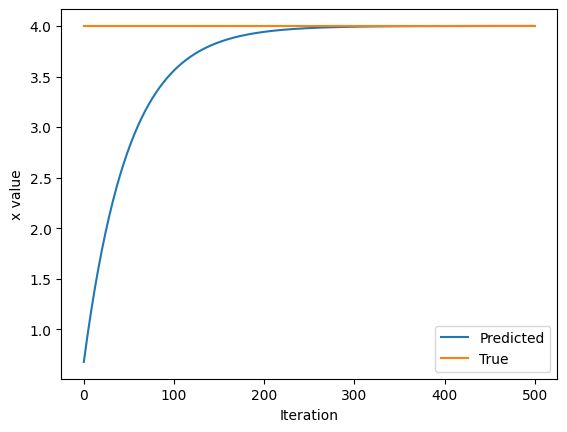

In [47]:
### Function minimization with automatic differentiation and SGD ###

# Initialize a random value for our initial x
x = tf.Variable([tf.random.normal([1])])
print("Initializing x={}".format(x.numpy()))

learning_rate = 1e-2 # learning rate for SGD
history = []
# Define the target value
x_f = 4

# We will run SGD for a number of iterations. At each iteration, we compute the loss,
#   compute the derivative of the loss with respect to x, and perform the SGD update.
for i in range(500):
  with tf.GradientTape() as tape:


    # ----------- Your code here --------------------->
    # define the loss as described above

    loss = tf.square(tf.subtract(x, x_f))

    # ------------------------------------------------>

  # loss minimization using gradient tape
  grad = tape.gradient(loss, x) # compute the derivative of the loss with respect to x
  new_x = x - learning_rate*grad # sgd update
  x.assign(new_x) # update the value of x
  history.append(x.numpy()[0])

# Plot the evolution of x as we optimize towards x_f!
plt.plot(history)
plt.plot([0, 500],[x_f,x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')

Notez qu'on peut calculer les dérivées d'ordre supérieur par imbrication:

In [48]:
a = tf.random.normal(shape=(2, 2))
b = tf.random.normal(shape=(2, 2))
a = tf.Variable(a)

with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as tape:
    c = tf.sqrt(tf.square(a) + tf.square(b))
    dc_da = tape.gradient(c, a)
  d2c_da2 = outer_tape.gradient(dc_da, a)
  print(d2c_da2)

tf.Tensor(
[[4.3153763e-05 2.0649552e-02]
 [4.4977540e-01 3.2427595e+00]], shape=(2, 2), dtype=float32)


## 5.6 - Conversion de labels: one-hot-encoding

Souvent, en machine learning, vous aurez un vecteur $y$ avec des nombres allant de $0$ à $C$, où $C$ est le nombre de classes. Si $C$ est par exemple 4, alors vous pourriez avoir le vecteur $y$ suivant que vous devrez convertir comme suit :

<img src="https://drive.google.com/uc?export=view&id=1NfPufghD8v2LC6I0kSs76B-5pzxhMObA" style="width:600px;height:150px ;">


On appelle cela un encodage "one hot", car dans la représentation finale, un seul élément de chaque colonne est "hot" (c'est-à-dire mis à 1). Dans tensorflow, vous pouvez utiliser une ligne de code :

- tf.one_hot(labels, class_nb, axis)

**Exercice : ** Implémentez la fonction ci-dessous pour prendre un vecteur d'étiquettes et le nombre total de classes $C$, et encoder le en one-hot. Utilisez `tf.one_hot()` pour faire cela.

In [56]:
def one_hot_matrix(labels, class_nb):
    """
    Creates a matrix where the i-th row corresponds to the ith class number and the jth column
                     corresponds to the jth training example. So if example j had a label i. Then entry (i,j)
                     will be 1.

    Arguments:
    labels -- vector containing the labels
    class_nb -- number of classes, the depth of the one hot dimension

    Returns:
    one_hot -- one hot matrix
    """

    # ----------- Your code here --------------------->

    # Create a tf.constant equal to C (depth), name it 'C'. (approx. 1 line)
    class_nb = tf.constant(class_nb, name='C')

    # Use tf.one_hot, be careful with the axis (approx. 1 line)
    one_hot_matrix = tf.one_hot(labels, depth=class_nb, axis=0)

    # ------------------------------------------------>

    return one_hot_matrix

In [57]:
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels, class_nb = 4)
print ("one_hot = " + str(one_hot))

one_hot = tf.Tensor(
[[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]], shape=(4, 6), dtype=float32)


**Expected Output**:

<table>
    <tr>
        <td>
            **one_hot**
        </td>
        <td>
        [[ 0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0.  0.]]
        </td>
    </tr>

</table>
